Elapsed time to compute the importances: 0.009 seconds


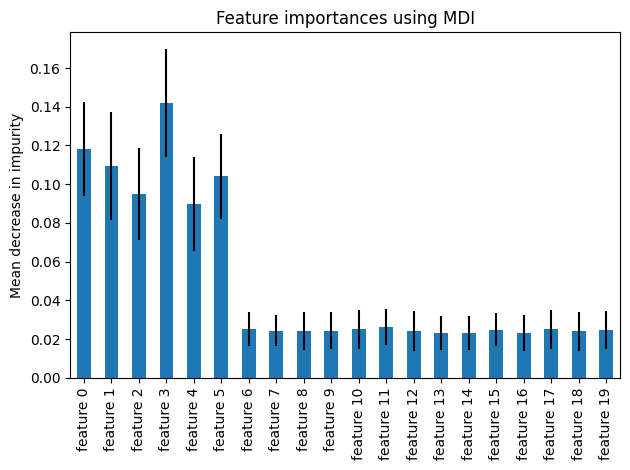

In [1]:
import numpy as np
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=6,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    random_state=0,
    shuffle=False,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()